CDSW Week 2: Using APIs to Get Data From the Internet
==============================

Agenda
------

**Last session** we learned some basic command in python

* Variables
* Types
* lists
* dicts
* for loops

**This week** we will learn how to find and retrieve data from the internet

**Next session** we will learn to do some Data Science on our data.


Warmup
------

**Lists of dictionaries**

In [1]:
# create a dictionary with age, town, and state.
tommy = {'name': 'tommy', 'age': 35, 'job': 'data science', 'town': 'seattle'}

In [5]:
tommy['name']

'tommy'

In [10]:
# create a list of all my siblings 
family = [
    {'name': 'tommy', 'age': 35, 'job': 'data science'},
    {'name': 'heather', 'age': 32, 'job': 'teacher'},
    {'name': 'joanna', 'age': 21, 'job': 'student'}
]

In [80]:
for person in family:
    print(person['name'] + " is " + str(person['age']) + " years old")
    print(f"{person['name']} is {person['age']} years old")
    print("{person['name']} is {person['age']} years old")
    break

tommy is 35 years old
tommy is 35 years old
{person['name']} is {person['age']} years old


In [78]:
print("{1+1}")
print(f"{1+1}")

{1+1}
2


In [ ]:
# iterate through the list and print the age and state (using f'')

*Creating strings from variables*

    print(f'Inside the curly braces is python: {1 + 1}')
    
*Nesting dictionaries in lists*

You can use lists as the values in dictionaries. 

You can use lists in lists!

You can use dictionaries in lists!

# Getting Data from APIs


**API** means Application Programmer Interface

An API is a set of instructions that describe how computers can interact with each other to request and receive information.

Some important questions we will ask that help us discover APIs is below.

|Question | In technical terms |
|:---------|:--------------------|
|Where is my data? | What is the domain? |
|How do I learn what data is available?| Where is the documentation? |
|How do I request specific data?| How do I formulate a URL for a specific purpose? |
|How do I interpret the data?| What is the structure and format of the output?|



**Let's walk through an example in the browser**

PlaceKitten!

In a browser, go to http://www.placekitten.com

|In technical terms | PlaceKitten |
|:---------|:--------------------|
|What is the domain? | http://www.placekitten.com |
|Where is the documentation?| The documentation is on the home page. |
|How do I formulate a URL for a specific purpose? | You put it in the url like http://www.placekitten/width/height |
|What is the structure and format of the output?| It's an image! |

# Accessing placekitten in python

We're going to use a special library called <code>requests</code>

In [20]:
from IPython.display import Image  # This line lets you display images. We'll use that in a bit.


# This line lets you use python to download data from the web.
import requests

In [26]:
# Get a 200 by 300 image from placekitten.
response = requests.get("http://www.placekitten.com/500/500")

In [27]:
# Look at the status code
response.status_code

200

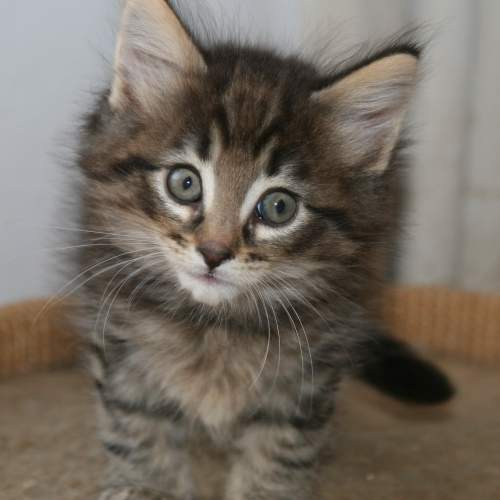

In [31]:
# print the content
Image(response.content)

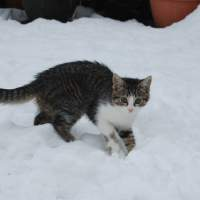

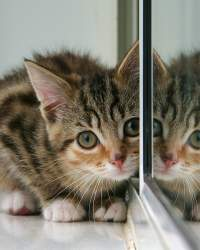

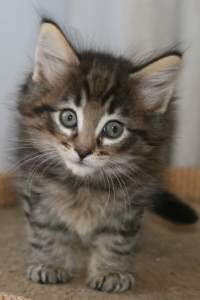

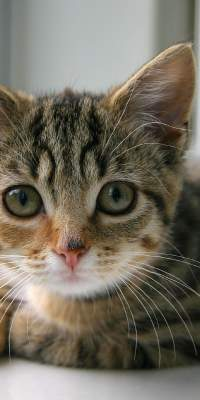

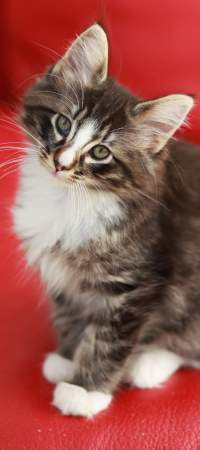

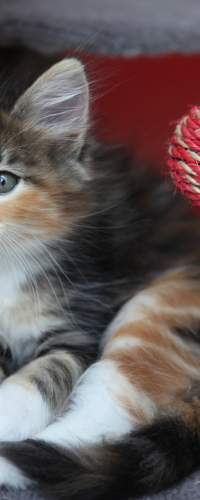

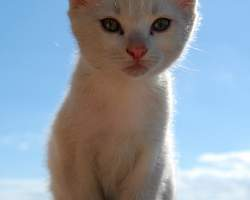

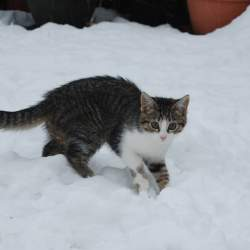

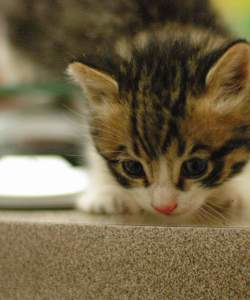

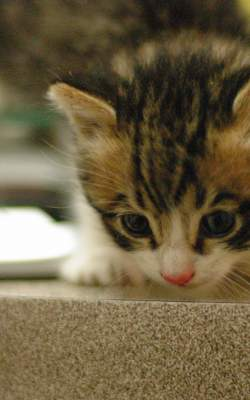

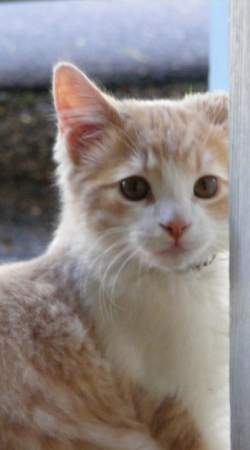

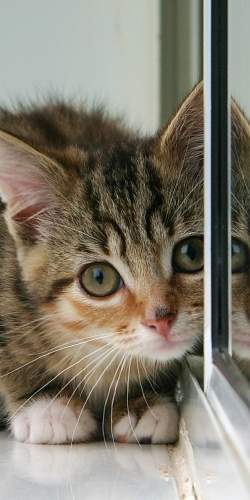

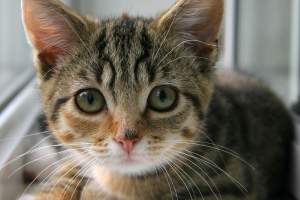

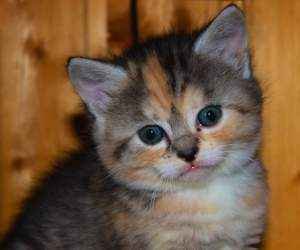

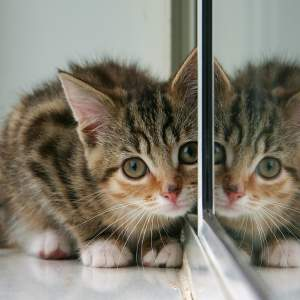

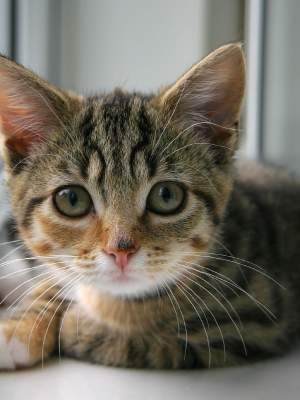

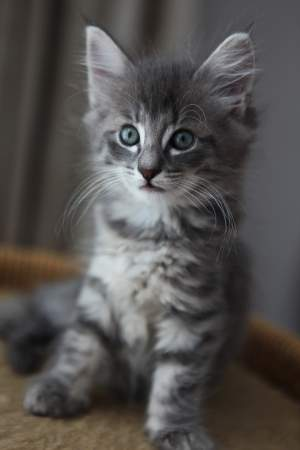

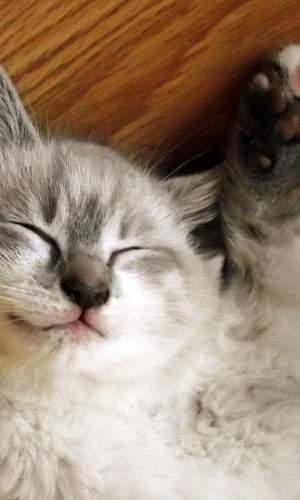

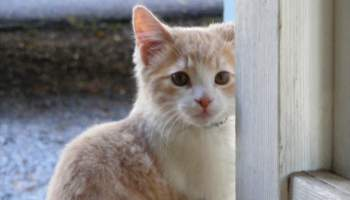

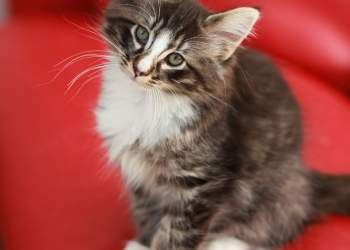

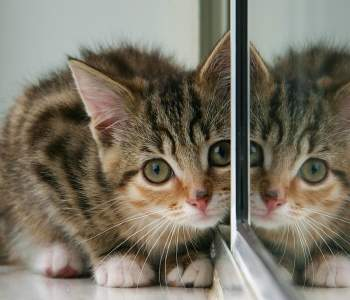

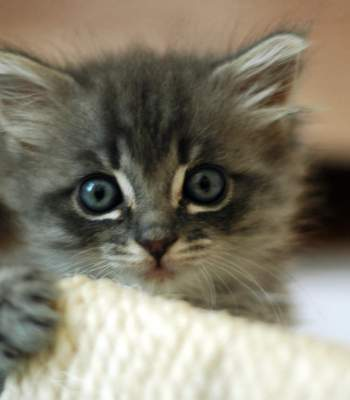

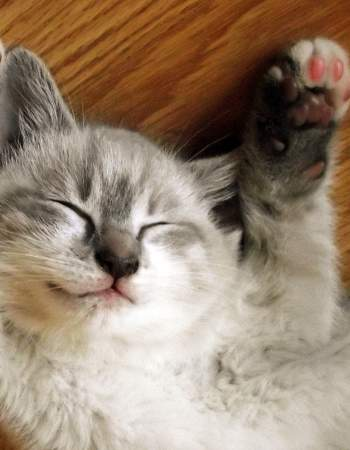

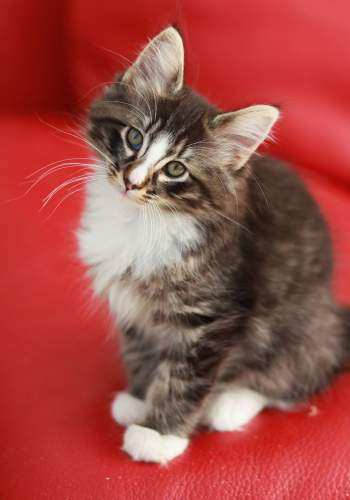

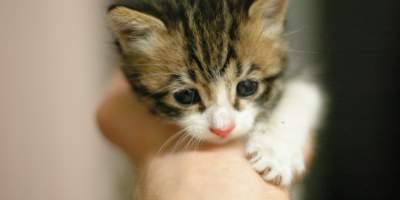

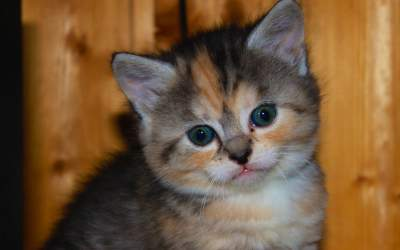

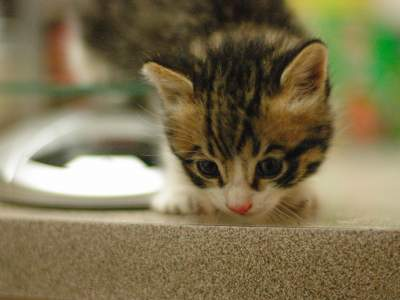

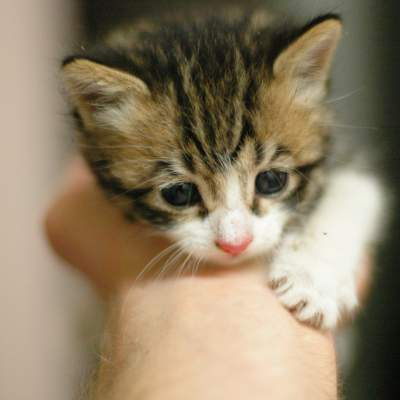

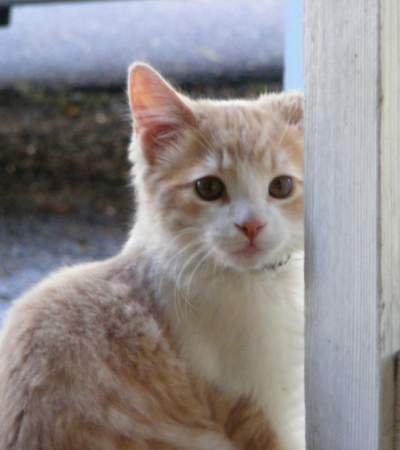

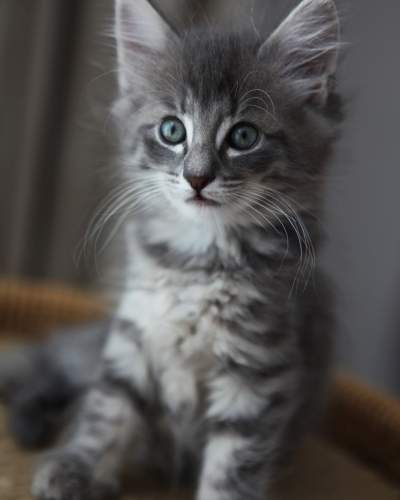

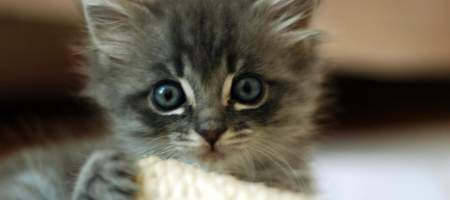

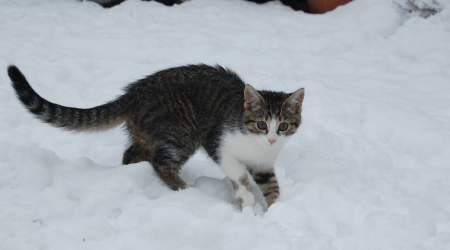

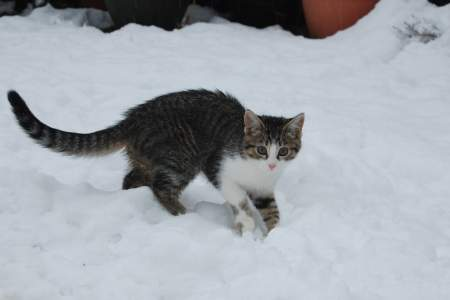

KeyboardInterrupt: 

In [50]:
import time
for width in [200, 250, 300, 350, 400, 450, 500]:
    for height in [200, 250, 300, 400, 450, 500]:
        url = f"http://placekitten.com/{width}/{height}"
        response = requests.get(url)
        display(Image(response.content))
        time.sleep(5)

In [49]:
import time
print("good night")
time.sleep(2)
print("good morning")

good night
good morning


* What happens when you add "g" to the URL?

* Can you write a loop to show several images?


# Example 2: Getting World Times

This example introduces a slightly more complicated API. It also introduces **JSON** which is a very common data format.

Our API is at http://worldtimeapi.org/

In [51]:
# Download list of time zones
response = requests.get("http://worldtimeapi.org/api/timezone")
print(response)

<Response [200]>


In [56]:
# Use the .json() function to get the response as a list or dict
# What did it return?
timezones = response.json()
print(len(timezones))
print(timezones[:10])

387
['Africa/Abidjan', 'Africa/Accra', 'Africa/Algiers', 'Africa/Bissau', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/El_Aaiun', 'Africa/Johannesburg', 'Africa/Juba']


In [57]:
# Download list of time zones
response = requests.get("http://worldtimeapi.org/api/timezone/America")
print(response)

<Response [200]>


In [58]:
# Get the time for your time zone (America/Los_Angeles)
print(response.json())

['America/Adak', 'America/Anchorage', 'America/Araguaina', 'America/Argentina/Buenos_Aires', 'America/Argentina/Catamarca', 'America/Argentina/Cordoba', 'America/Argentina/Jujuy', 'America/Argentina/La_Rioja', 'America/Argentina/Mendoza', 'America/Argentina/Rio_Gallegos', 'America/Argentina/Salta', 'America/Argentina/San_Juan', 'America/Argentina/San_Luis', 'America/Argentina/Tucuman', 'America/Argentina/Ushuaia', 'America/Asuncion', 'America/Atikokan', 'America/Bahia', 'America/Bahia_Banderas', 'America/Barbados', 'America/Belem', 'America/Belize', 'America/Blanc-Sablon', 'America/Boa_Vista', 'America/Bogota', 'America/Boise', 'America/Cambridge_Bay', 'America/Campo_Grande', 'America/Cancun', 'America/Caracas', 'America/Cayenne', 'America/Chicago', 'America/Chihuahua', 'America/Costa_Rica', 'America/Creston', 'America/Cuiaba', 'America/Curacao', 'America/Danmarkshavn', 'America/Dawson', 'America/Dawson_Creek', 'America/Denver', 'America/Detroit', 'America/Edmonton', 'America/Eirunepe'

In [61]:
timezone = 'America/Chihuahua'
url = f"http://worldtimeapi.org/api/timezone/{timezone}"
response = requests.get(url)
print(response.status_code)
print(response.json())

200
{'week_number': 5, 'utc_offset': '-07:00', 'utc_datetime': '2020-02-01T19:17:41.519643+00:00', 'unixtime': 1580584661, 'timezone': 'America/Chihuahua', 'raw_offset': -25200, 'dst_until': None, 'dst_offset': 0, 'dst_from': None, 'dst': False, 'day_of_year': 32, 'day_of_week': 6, 'datetime': '2020-02-01T12:17:41.519643-07:00', 'client_ip': '205.175.106.130', 'abbreviation': 'MST'}


In [77]:
# Write a function to print the times in all America time zones.
response_tz = requests.get("http://worldtimeapi.org/api/timezone/America")
time_zones = response_tz.json()
print(f"There are {len(time_zones)} in my set")

previously_seen_hours = {}

for time_zone in time_zones:
    url = f"http://worldtimeapi.org/api/timezone/{time_zone}"
    response = requests.get(url)
    status_code = response.status_code
    if status_code == 200:
        time_data = response.json()
        current_dt = time_data['datetime'][:13]
        if current_dt not in previously_seen_hours:
            print(f"{time_zone}: {current_dt}")
            previously_seen_hours[current_dt] = True
    else:
        print(f"Failed for {url}  {status_code}")
        time.sleep(10)
    time.sleep(1)

# Challenge 2: print only unique time zone values.
# Challenge 3: print all time zones with same time

There are 130 in my set
America/Adak: 2020-02-01T10
America/Anchorage: 2020-02-01T11
America/Araguaina: 2020-02-01T17
America/Atikokan: 2020-02-01T15
America/Bahia_Banderas: 2020-02-01T14
America/Barbados: 2020-02-01T16
America/Boise: 2020-02-01T13
Failed for http://worldtimeapi.org/api/timezone/America/Cambridge_Bay  403
Failed for http://worldtimeapi.org/api/timezone/America/Campo_Grande  403
Failed for http://worldtimeapi.org/api/timezone/America/Cancun  403
Failed for http://worldtimeapi.org/api/timezone/America/Caracas  403
Failed for http://worldtimeapi.org/api/timezone/America/Cayenne  403
Failed for http://worldtimeapi.org/api/timezone/America/Chicago  403
Failed for http://worldtimeapi.org/api/timezone/America/Chihuahua  403
America/Danmarkshavn: 2020-02-01T20
America/Dawson: 2020-02-01T12
Failed for http://worldtimeapi.org/api/timezone/America/Godthab  403
Failed for http://worldtimeapi.org/api/timezone/America/Goose_Bay  403
Failed for http://worldtimeapi.org/api/timezone/Am

KeyboardInterrupt: 

In [74]:
current_dt[:13]

'2020-02-01T09'

# This Afternoon

We need a show of hands for who wants to attend each session:

* Yelp data

* Twitter (only if you already did the homework!)

* Wikipedia